<a href="https://colab.research.google.com/github/JRahin735/sentiment-analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from tensorflow.keras.utils import plot_model



In [ ]:
# Load the CSV file into a DataFrame
data = pd.read_csv('European Restaurant Reviews.csv')
data.head()

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the c...
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium,..."
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, al..."
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023 •,Sadly I used the high TripAdvisor rating too ...
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,Nov 2022 •,From the start this meal was bad- especially g...


In [ ]:
# Parameters
vocab_size = 10000
max_length = 100
embedding_dim = 100

In [ ]:
data = data.drop(columns='Country')
data = data.drop(columns='Restaurant Name')
data = data.drop(columns='Review Date')

In [ ]:
data["Sentiment"] = (data["Sentiment"] == "Positive").astype(int)
data.head()

,Sentiment,Review Title,Review
0,0,Rude manager,The manager became agressive when I said the c...
1,0,A big disappointment,"I ordered a beef fillet ask to be done medium,..."
2,0,Pretty Place with Bland Food,"This is an attractive venue with welcoming, al..."
3,0,Great service and wine but inedible food,Sadly I used the high TripAdvisor rating too ...
4,0,Avoid- Worst meal in Rome - possibly ever,From the start this meal was bad- especially g...


In [ ]:
# Tokenization and Padding
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(data['Review Title'])
sequences = tokenizer.texts_to_sequences(data['Review Title'])
padded_sequences = pad_sequences(sequences, maxlen=max_length)

In [ ]:
# Train-Test Split
train_data, test_data, train_labels, test_labels = train_test_split(padded_sequences, data['Sentiment'], test_size=0.2)

In [ ]:
# MODEL

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# TRAINING

In [ ]:
history = model.fit(np.array(train_data), np.array(train_labels), epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
30/30 [==============================] - 16s 358ms/step - loss: 0.5087 - accuracy: 0.8177 - val_loss: 0.4769 - val_accuracy: 0.8216
Epoch 2/10
30/30 [==============================] - 9s 307ms/step - loss: 0.4381 - accuracy: 0.8313 - val_loss: 0.4371 - val_accuracy: 0.8216
Epoch 3/10
30/30 [==============================] - 11s 353ms/step - loss: 0.3189 - accuracy: 0.8667 - val_loss: 0.3127 - val_accuracy: 0.8714
Epoch 4/10
30/30 [==============================] - 11s 375ms/step - loss: 0.1400 - accuracy: 0.9438 - val_loss: 0.2983 - val_accuracy: 0.9046
Epoch 5/10
30/30 [==============================] - 10s 340ms/step - loss: 0.0709 - accuracy: 0.9750 - val_loss: 0.3213 - val_accuracy: 0.9087
Epoch 6/10
30/30 [==============================] - 10s 316ms/step - loss: 0.0456 - accuracy: 0.9906 - val_loss: 0.3679 - val_accuracy: 0.9129
Epoch 7/10
30/30 [==============================] - 11s 386ms/step - loss: 0.0351 - accuracy: 0.9906 - val_loss: 0.3975 - val_accuracy: 0.9004


In [ ]:
# Evaluation
test_loss, test_accuracy = model.evaluate(np.array(test_data), np.array(test_labels))
print(f'Test Accuracy: {test_accuracy}')

10/10 [==============================] - 3s 298ms/step - loss: 0.3627 - accuracy: 0.8870
Test Accuracy: 0.8870431780815125


In [ ]:
# Prediction
new_reviews = ["I loved this movie!", "The product was terrible."]
new_sequences = tokenizer.texts_to_sequences(new_reviews)
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_length)
predictions = model.predict(new_padded_sequences)
sentiments = ['positive' if pred > 0.5 else 'negative' for pred in predictions]
print(sentiments)

1/1 [==============================] - 1s 862ms/step
['positive', 'negative']


In [ ]:

# Save model
model.save('sentiment_analysis_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


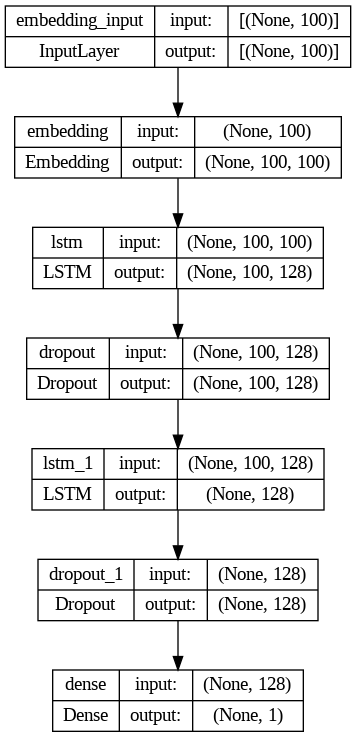

In [ ]:
# Visualize model architecture
plot_model(model, to_file='model_visualization.png', show_shapes=True, show_layer_names=True)
